(100, 100)
MSE= 0.05983298950195313 PSNR= 12.23059297479422


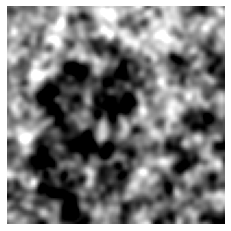

MSE= 0.02221355285644531 PSNR= 16.533819744299453


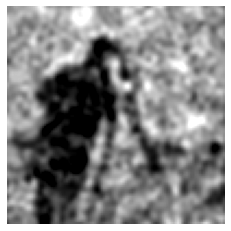

MSE= 0.012230085754394531 PSNR= 19.125704977854827


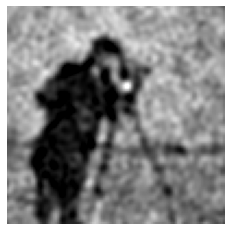

MSE= 0.008467870330810546 PSNR= 20.722258009885522


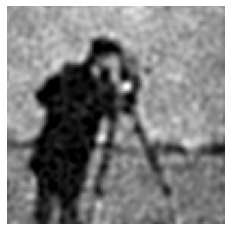

MSE= 0.006948310852050782 PSNR= 21.581207604162937


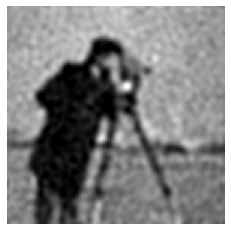

MSE= 0.006144479370117187 PSNR= 22.115149095658282


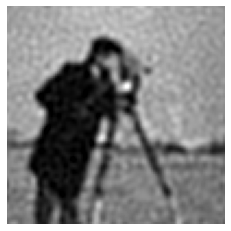

MSE= 0.005764453125 PSNR= 22.39241888032856


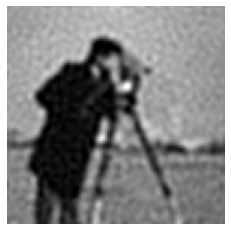

MSE= 0.005501876449584961 PSNR= 22.594891663756247


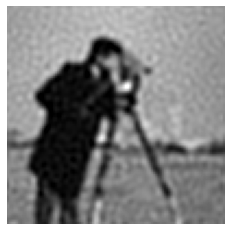

MSE= 0.00531359748840332 PSNR= 22.746113470251306


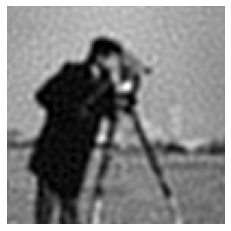

MSE= 0.005170162582397461 PSNR= 22.864957997439937


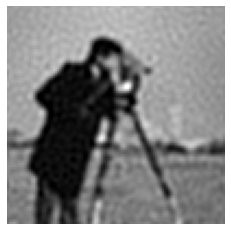

In [6]:
import rmnn as rm
import numpy as np
import collections
import torch as t
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

mode = 'inr'
# splitinr

data = rm.toolbox.load_data('./data/img/Cameraman.jpg',data_type='gray_img',data_shape=(100,100))
data_shape = data.shape
print(data_shape)
# data_noise = rm.toolbox.add_noise(data,'poisson',0.99)
# data = rm.toolbox.load_data('circle',data_type='syn',data_shape=data_shape)

mask = 1-rm.toolbox.load_mask(mask_type='random',random_rate=0.8,mask_path=None,data_shape=data.shape,mask_shape='same',down_sample_rate=4)
# mask = rm.toolbox.load_mask(mask_type='img',random_rate=0.8,mask_path='./mask/img/mask.png',data_shape=data.shape,mask_shape=data_shape,down_sample_rate=4)
data_in = rm.toolbox.get_dataloader(x_mode=mode,batch_size=data_shape[0]*data_shape[1],shuffle_if=False,data=data,mask=mask,xrange=1)
# net = rm.represent.net(device='cpu',fid_name='mse',net_name='increase_tanh',parameters=[2,256,1,4],opt_name='Adam',lr=1e-3)

parameters = collections.OrderedDict()
parameters[mode+'_siren 0']=[2,256,1,4,30]
# parameters[mode+'_siren 0']=[3,256,[100,100,100],4,'tucker',256]

reg_parameters = {}
# reg_parameters['lap 0'] = [2,3e-3]
for i in range(2):
    reg_parameters[mode+'r '+str(i)] = [data_shape[i],i,'siren',1e-6]
    # reg_parameters['air '+str(i)] = [data_shape[i],'row',1e-6]
    # reg_parameters['splitinr '+str(i)] = [data_shape[i],'row',1e-6]
    # reg_parameters['splitair '+str(i)] = [data_shape[i],'row',1e-6]

net = rm.represent.net(device=0,fid_name='mse',net_name='composition',parameters=parameters,opt_name='Adam',lr=1e-3,weight_decay=0,reg_parameters=reg_parameters)
for i in range(10):
    net.fit(data_in,data_shape=data_shape,epoch=10,verbose=False)
    net.test(data_in,data_shape=data_shape,show_if=True,eval_if=True)
    
    